<a href="https://colab.research.google.com/github/iiriri13/AI_SpectrumStar/blob/main/SpectrumStar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KDD** process

Importing libraries

In [1]:
import pandas as pd # MANGING the dataset
import numpy as np

Import kaggle dataset

In [2]:
!mkdir -p /root/.config/kaggle
!cp /kaggle.json /root/.config/kaggle/
!chmod 600 /root/.config/kaggle/kaggle.json

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

print("Authentication successful!")

Authentication successful!


In [4]:
api.dataset_download_files('cihan063/autism-image-data', path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/cihan063/autism-image-data


In [5]:
!ls ./data

AutismDataset


In [6]:
!pip install Pillow

Import images from dataset

In [7]:
import os
from PIL import Image

# مسار مجلد valid
valid_folder = './data/AutismDataset/valid'

# إعداد قائمة لتخزين جميع الصور
all_images = []

# تحميل جميع الصور من المجلدين الفرعيين داخل valid
for sub_folder in os.listdir(valid_folder):
    sub_folder_path = os.path.join(valid_folder, sub_folder)
    if os.path.isdir(sub_folder_path):  # التأكد أنه مجلد وليس ملف
        images = [os.path.join(sub_folder_path, img) for img in os.listdir(sub_folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
        all_images.extend(images)

# طباعة عدد الصور المحملة
print(f"{len(all_images)} has been downloaded")

# عرض أول صورة كاختبار
for img_path in all_images:
    img = Image.open(img_path)
    img.show()

100 has been downloaded


First try

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد مولد البيانات
datagen = ImageDataGenerator(rescale=1.0/255)

# تحميل البيانات المصنفة من مجلد valid
data = datagen.flow_from_directory(
    './data/AutismDataset/valid',
    target_size=(128, 128),  # تغيير حجم الصور إلى 128x128
    batch_size=32,
    class_mode='binary'  # لأن لدينا فئتين فقط: Autistic و Non_Autistic
)

# إنشاء نموذج بسيط
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # مخرجات النموذج: فئة واحدة مع sigmoid
])

# تجميع النموذج
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج
history = model.fit(data, epochs=10)


Found 100 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 537ms/step - accuracy: 0.3582 - loss: 2.0810
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 686ms/step - accuracy: 0.5585 - loss: 0.7361
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 814ms/step - accuracy: 0.5693 - loss: 0.6919
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 613ms/step - accuracy: 0.7481 - loss: 0.6757
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 492ms/step - accuracy: 0.6415 - loss: 0.6552
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 839ms/step - accuracy: 0.7311 - loss: 0.6003
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 500ms/step - accuracy: 0.8016 - loss: 0.4914
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 506ms/step - accuracy: 0.8078 - loss: 0.4303
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 506ms/step - accuracy: 0.8423 - loss: 0.4007
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 560ms/step - accuracy: 0.7854 - loss: 0.4049


Second Try

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد مولد البيانات مع Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # تخصيص 20% من البيانات للتحقق
)

# تحميل بيانات التدريب والتحقق
train_data = datagen.flow_from_directory(
    './data/AutismDataset/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_data = datagen.flow_from_directory(
    './data/AutismDataset/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# إنشاء نموذج بسيط مع Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')  # المخرجات: فئة واحدة مع sigmoid
])

# تجميع النموذج
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج مع بيانات التحقق
history = model.fit(train_data, epochs=20, validation_data=validation_data)


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4771 - loss: 2.9603 - val_accuracy: 0.5000 - val_loss: 0.9351
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 661ms/step - accuracy: 0.4479 - loss: 2.1954 - val_accuracy: 0.5000 - val_loss: 0.7081
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4990 - loss: 0.9995 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 663ms/step - accuracy: 0.5000 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 656ms/step - accuracy: 0.4703 - loss: 0.7111 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5979 - loss: 0.6881 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 856ms/step - accuracy: 0.4750 - loss: 0.6925 - val_accuracy: 0.4000 - val_loss: 0.6930
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 668ms/step - accuracy: 0.5234 - loss: 0.6900 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 9/20
3

Third Try

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد مولد البيانات مع Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # تخصيص 20% من البيانات للتحقق
)

# تحميل بيانات التدريب والتحقق
train_data = datagen.flow_from_directory(
    './data/AutismDataset/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_data = datagen.flow_from_directory(
    './data/AutismDataset/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# استخدام MobileNetV2 كقاعدة
base_model = tf.keras.applications.MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # تجميد الطبقات الأساسية

# إنشاء النموذج
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # مخرجات النموذج: فئة واحدة مع sigmoid
])

# تجميع النموذج
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج مع بيانات التحقق
history = model.fit(train_data, epochs=20, validation_data=validation_data)


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4229 - loss: 1.0316 - val_accuracy: 0.6000 - val_loss: 0.6819
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 388ms/step - accuracy: 0.5089 - loss: 0.8890 - val_accuracy: 0.5000 - val_loss: 0.9733
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 381ms/step - accuracy: 0.5813 - loss: 0.7537 - val_accuracy: 0.7000 - val_loss: 0.5845
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 464ms/step - accuracy: 0.6646 - loss: 0.5404 - val_accuracy: 0.6500 - val_loss: 0.6065
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 389ms/step - accuracy: 0.7484 - loss: 0.5124 - val_accuracy: 0.6000 - val_loss: 0.6748
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 664ms/step - accuracy: 0.7617 - loss: 0.5107 - val_accuracy: 0.6500 - val_loss: 0.7425
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 593ms/step - accuracy: 0.6438 - loss: 0.5613 - val_accuracy: 0.6500 - val_loss:

انتهاء التدريب

testing

In [14]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# مسار مجلد valid
valid_folder = './data/AutismDataset/valid'

# متغيرات لحساب الدقة
correct_predictions = 0
total_images = 0

# التحقق من جميع الصور في مجلد valid
for sub_folder in os.listdir(valid_folder):
    sub_folder_path = os.path.join(valid_folder, sub_folder)
    if os.path.isdir(sub_folder_path):
        for img_name in os.listdir(sub_folder_path):
            img_path = os.path.join(sub_folder_path, img_name)
            img = image.load_img(img_path, target_size=(128, 128))
            img_array = image.img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            prediction = model.predict(img_array)
            predicted_class = "Non-Autistic" if prediction[0][0] > 0.5 else "Autistic"
            true_class = "Non-Autistic" if "Non_Autistic" in sub_folder else "Autistic"

            if predicted_class == true_class:
                correct_predictions += 1
            total_images += 1
            print(f"Image: {img_name}, Predicted: {predicted_class}, True: {true_class}")

# حساب الدقة النهائية
accuracy = (correct_predictions / total_images) * 100
print(f"\nFinal Accuracy: {accuracy:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image: 47.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image: 08.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image: 32.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: 17.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 12.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image: 37.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image: 25.jpg, Predicted: Non-Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 43.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 02.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: 20.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Image: 30.jpg, Predicted: Autistic, True: Autistic
1/1 ━━━━━━━━━━━━━

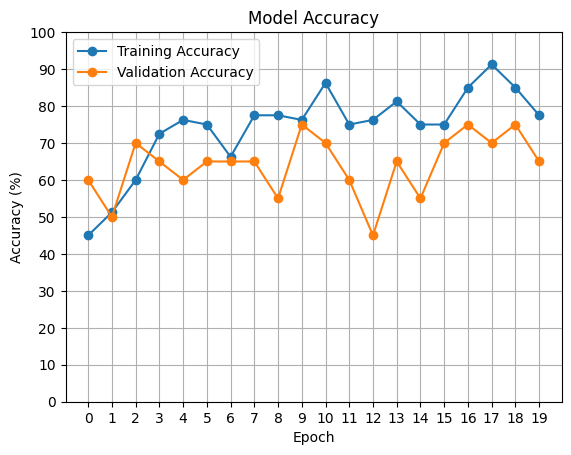

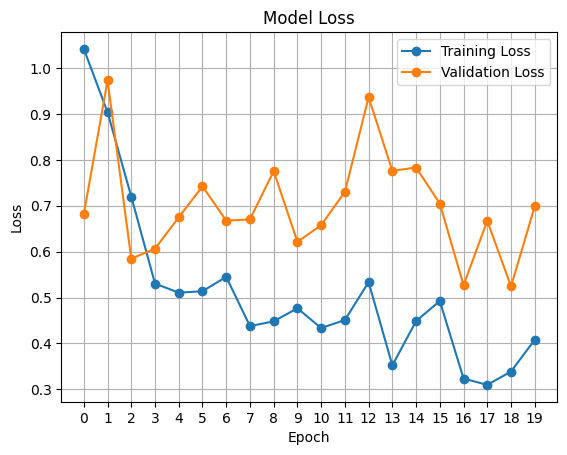

In [17]:
import matplotlib.pyplot as plt

# تحويل الدقة إلى نسب مئوية مع تقريب لمنزلتين عشريتين
accuracy = [round(a * 100, 2) for a in history.history['accuracy']]
val_accuracy = [round(a * 100, 2) for a in history.history['val_accuracy']]

# رسم منحنى الدقة مع نقاط البيانات
plt.plot(accuracy, label='Training Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.xticks(range(len(accuracy)))  # عرض كل Epoch على المحور x
plt.yticks(range(0, 101, 10))     # عرض القيم من 0% إلى 100% على المحور y
plt.grid(True)                     # إضافة شبكة لتسهيل قراءة القيم
plt.legend()
plt.show()

# رسم منحنى الخسارة مع نقاط البيانات
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(len(accuracy)))  # عرض كل Epoch على المحور x
plt.grid(True)                     # إضافة شبكة لتسهيل قراءة القيم
plt.legend()
plt.show()


Save the model

In [15]:
model.save('autism_classifier_model.keras')